# Creater : Karan Dave  
# Task-4: Explore Business Analytics 


In [1]:
#Importing Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline

# Data Reading & Exploration

In [2]:
Data=pd.read_csv('SampleSuperstore.csv')

In [3]:
Data.rename({'Ship Mode':'Ship_Mode'},inplace=True,axis=1)
Data.head(10)

,Ship_Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [4]:
print(Data.isnull().sum())

Ship_Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship_Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
Data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
Data.shape

(9994, 13)

# Data Visualization

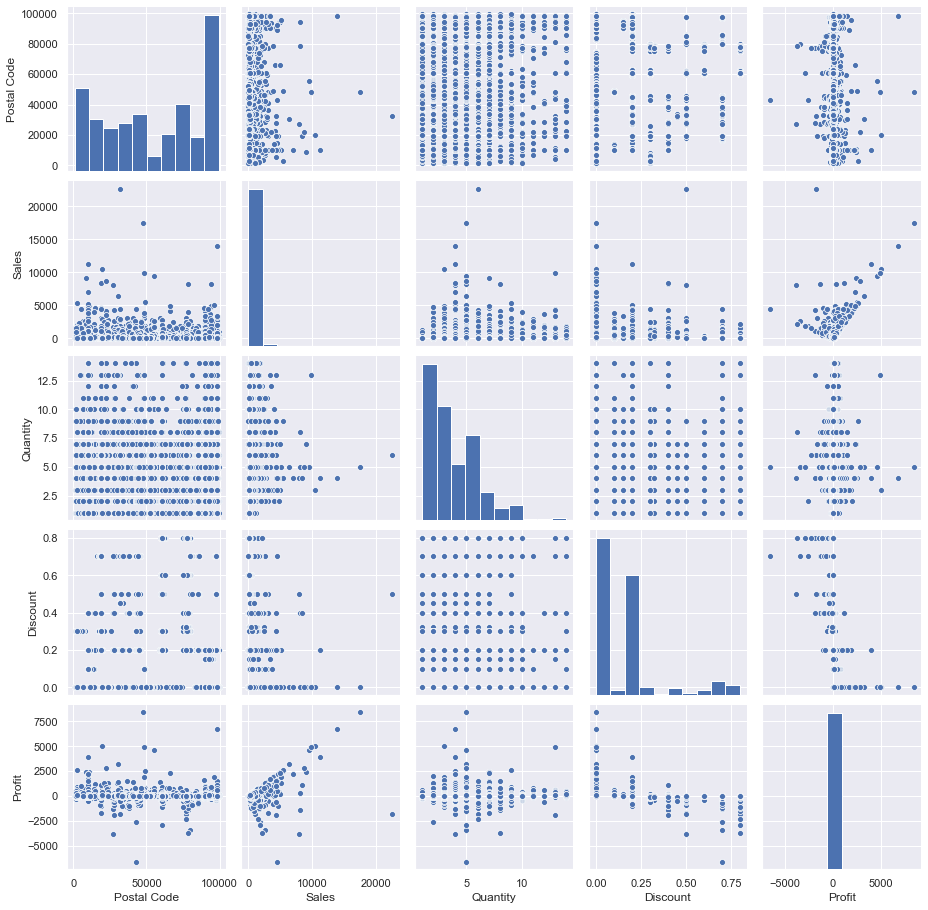

In [8]:
sns.set(style="darkgrid")
sns.pairplot(Data)

# Correlation Matrix of Data 

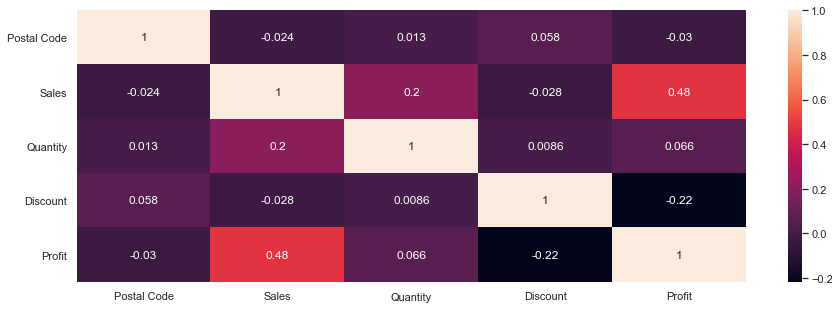

In [9]:
plt.figure(figsize=(15,5))
sns.heatmap(Data.corr(),annot=True)

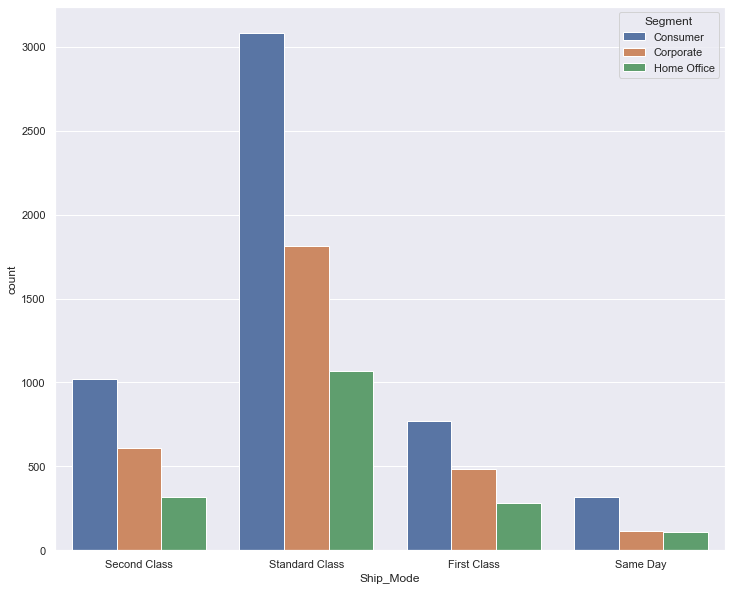

In [10]:
plt.figure(figsize=(12,10))
sns.countplot(Data['Ship_Mode'],hue=Data['Segment'])

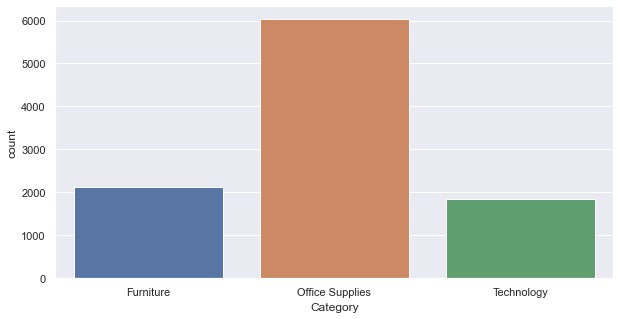

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(Data['Category'])

# Visualizing Sub-Category

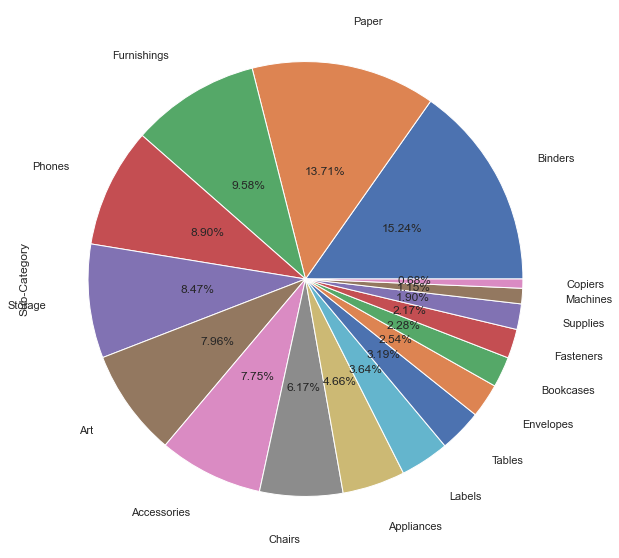

In [12]:
plt.figure(figsize=(12,10))
Data['Sub-Category'].value_counts().plot.pie(autopct='%1.2f%%',explode=None,pctdistance=0.5,labeldistance=1.2)
plt.show()

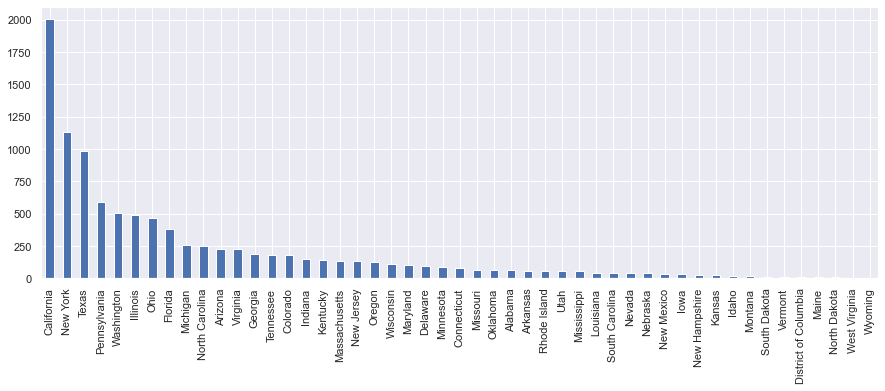

In [13]:
Data['State'].value_counts().plot.bar(figsize=(15,5))
plt.show()

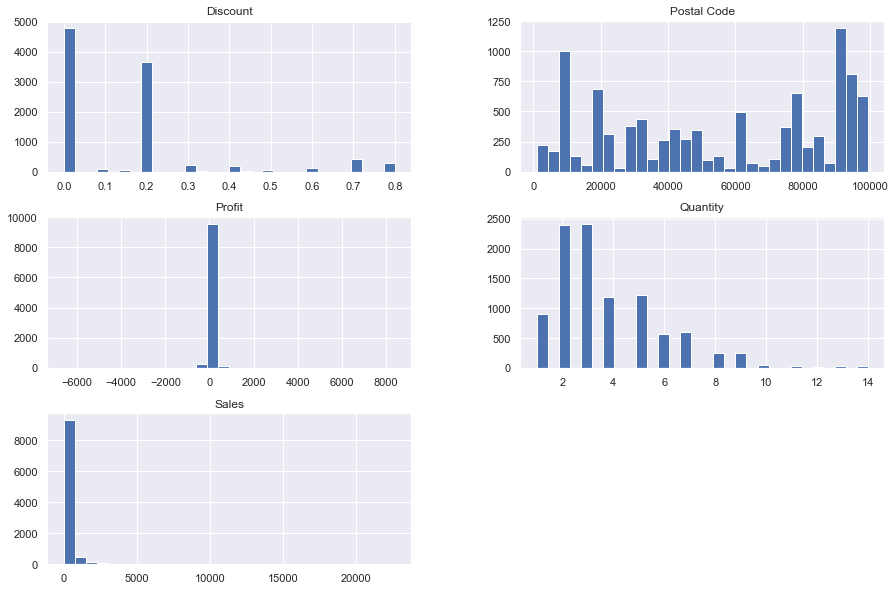

In [14]:
Data.hist(figsize=(15,10),bins=30)
plt.show()

# Sales VS Profit

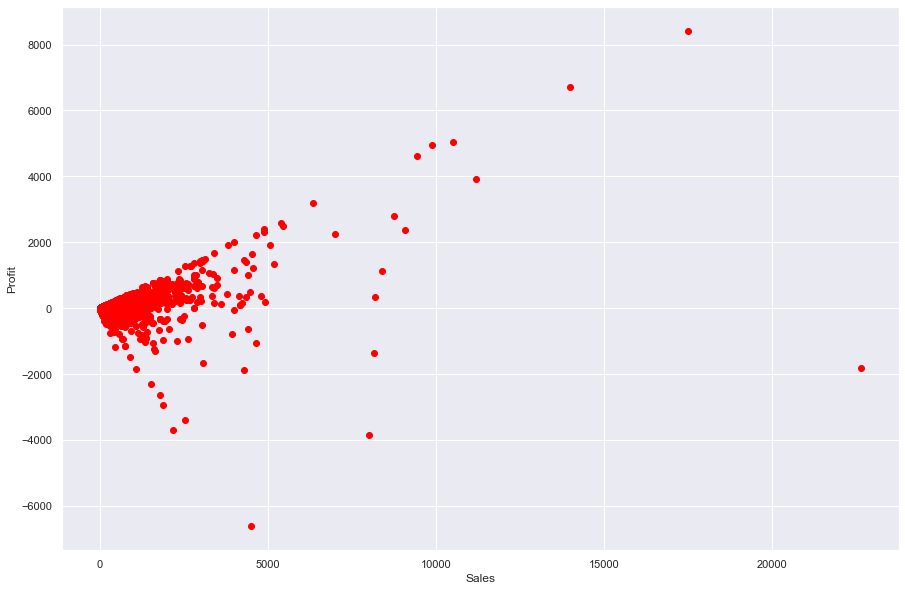

In [15]:
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(Data.Sales,Data.Profit,c='red')
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
plt.show()

# Discount VS Profit

<Figure size 1080x720 with 0 Axes>

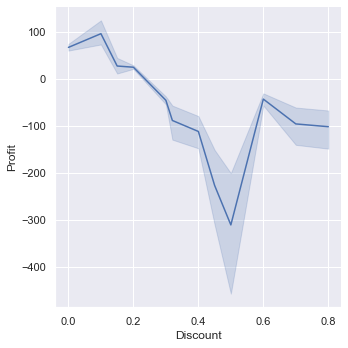

In [16]:
plt.figure(figsize=(15,10))
sns.relplot(x="Discount", y="Profit",kind="line", data=Data)

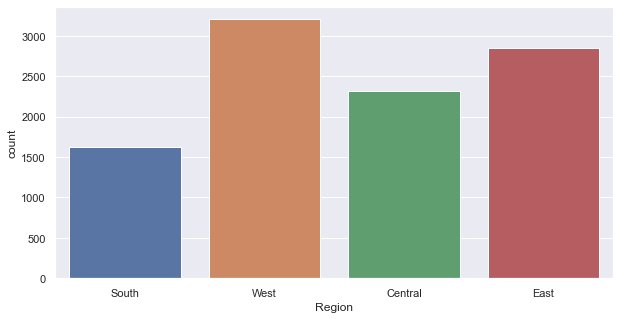

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(Data['Region'])

# Visualizing Profit Based On Region

<Figure size 864x720 with 0 Axes>

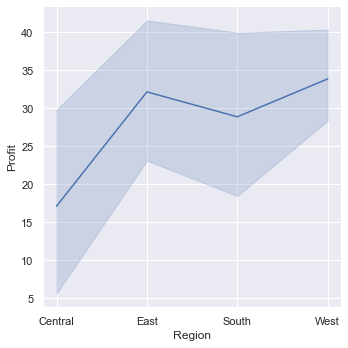

In [18]:
plt.figure(figsize=(12,10))
sns.relplot(x="Region", y="Profit",kind="line", data=Data)

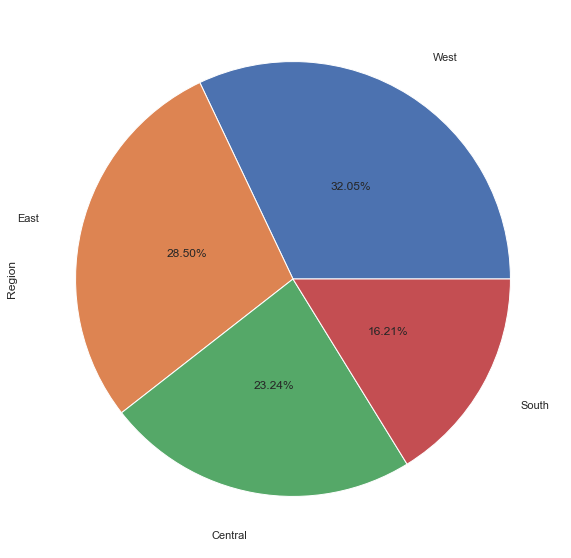

In [19]:
plt.figure(figsize=(15,10))
Data['Region'].value_counts().plot.pie(autopct='%1.2f%%',explode=None,pctdistance=0.5,labeldistance=1.2)
plt.show()

# Visualizing Sales & Profit Based On Region

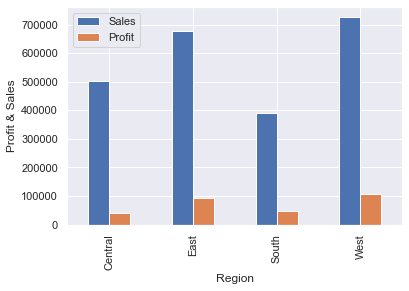

In [20]:
temp=Data.groupby('Region')[['Sales','Profit']].sum().plot.bar()
plt.ylabel('Profit & Sales')
plt.show()

# Visualizing Sales & Profit Based On Category

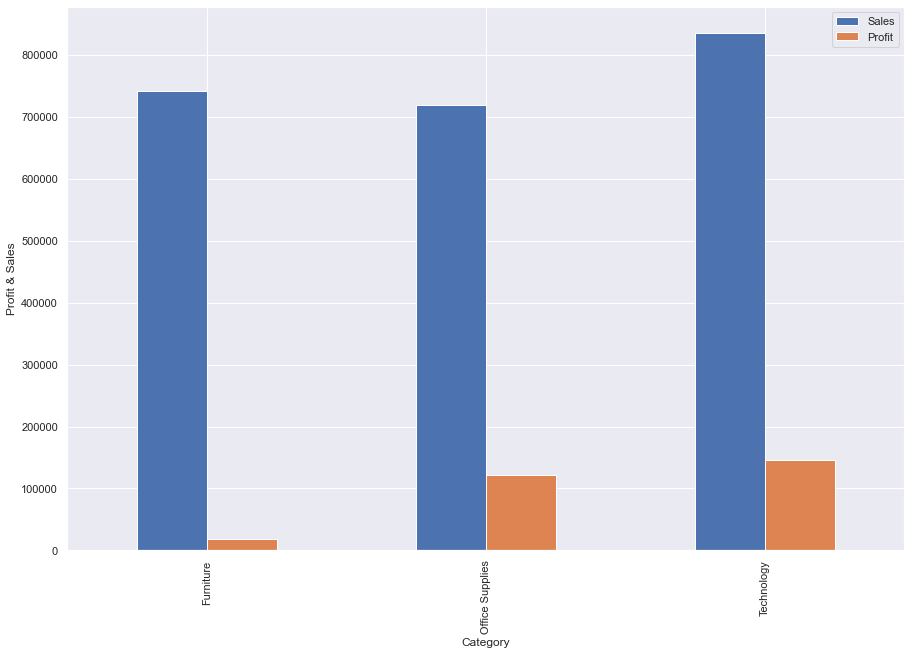

In [21]:
temp=Data.groupby('Category')[['Sales','Profit']].sum().plot.bar(figsize=(15,10))
plt.ylabel('Profit & Sales')
plt.show()

# Visualizing Sales & Profit Based On Sub-Category

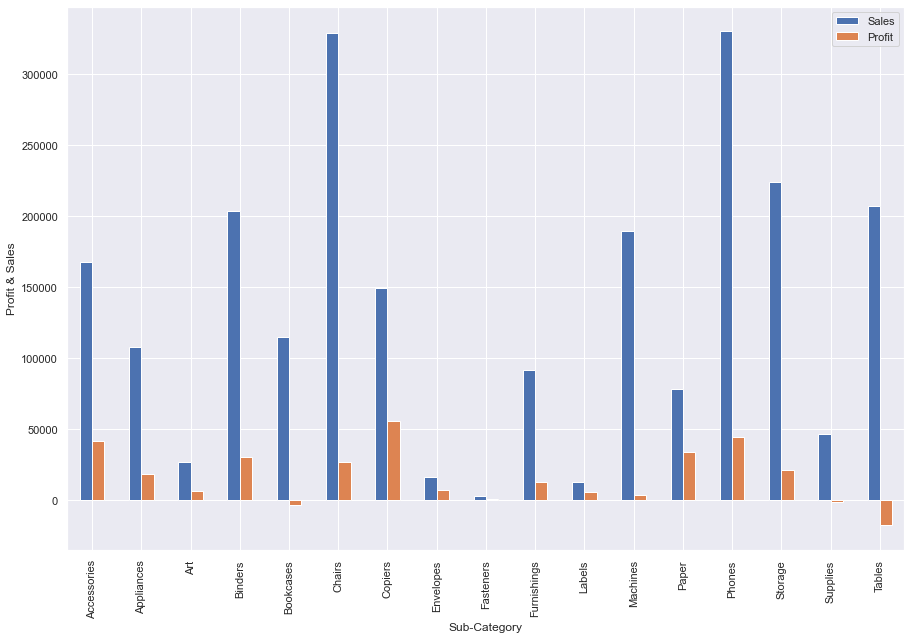

In [22]:
temp=Data.groupby('Sub-Category')[['Sales','Profit']].sum().plot.bar(figsize=(15,10))
plt.ylabel('Profit & Sales')
plt.show()

In [23]:
Sample=Data[Data.Profit >= 50]

# Visualizing The Loss in Profit Based On Region

In [24]:
sample=Data[Data.Profit <=0]

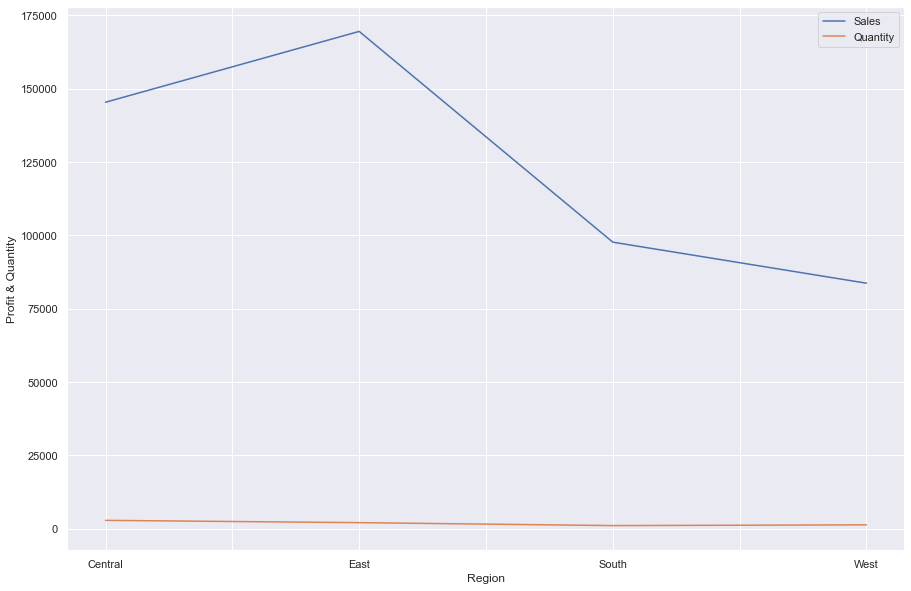

In [25]:
temp=sample.groupby('Region')[['Sales','Quantity']].sum().plot.line(figsize=(15,10))
plt.ylabel('Profit & Quantity')
plt.show()

# Visualizing Of Profit More Than 50% Based on Region

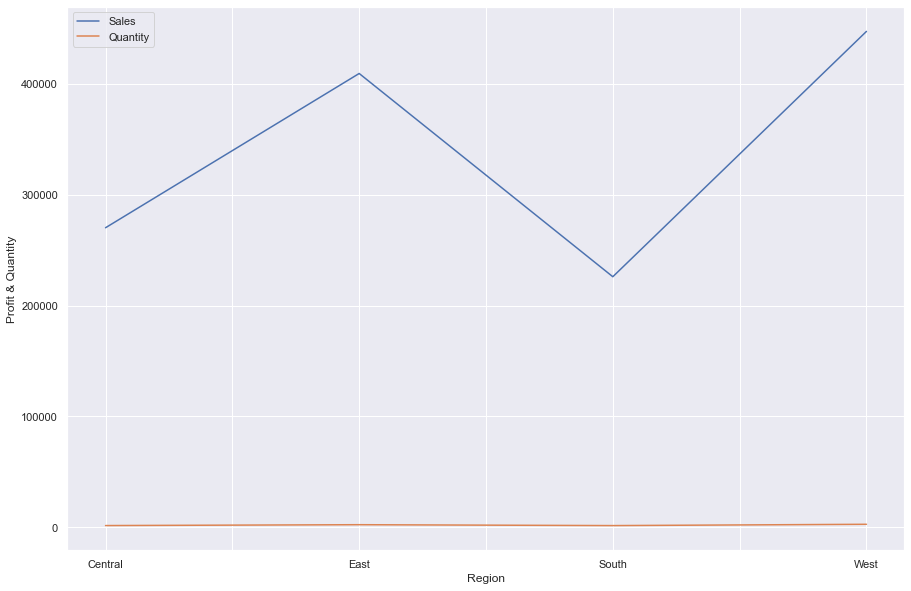

In [26]:
temp=Sample.groupby('Region')[['Sales','Quantity']].sum().plot.line(figsize=(15,10))
plt.ylabel('Profit & Quantity')
plt.show()